In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
# Load the DataSet
file_path = "HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)

In [5]:
print("Shape:", df.shape)

Shape: (1470, 35)


In [6]:
print("Columns:", df.columns.tolist())


Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [7]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

In [8]:
print("\nData Types:\n", df.dtypes)



Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalW

In [9]:
print("\nFirst 5 Rows:\n", df.head())



First 5 Rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptio

In [10]:
# To Know the infomaration about the data
info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.describe # By that we can make sure that, there is no null values, manually at rondamly(first 5 col and last 5 colms)

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [13]:
# Encode Categorical Variables for visulaization
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [14]:
# Detect Outliers (here i used Z-Score method for to detect outliers)
numerical_cols = df.select_dtypes(include=[np.number]).columns
outliers = {}
for col in numerical_cols:
    z_score = (df[col] - df[col].mean()) / df[col].std()
    outliers[col] = (np.abs(z_score) > 3).sum()
print("\nOutliers per feature:\n", outliers)


Outliers per feature:
 {'Age': np.int64(0), 'Attrition': np.int64(0), 'BusinessTravel': np.int64(0), 'DailyRate': np.int64(0), 'Department': np.int64(0), 'DistanceFromHome': np.int64(0), 'Education': np.int64(0), 'EducationField': np.int64(0), 'EmployeeCount': np.int64(0), 'EmployeeNumber': np.int64(0), 'EnvironmentSatisfaction': np.int64(0), 'Gender': np.int64(0), 'HourlyRate': np.int64(0), 'JobInvolvement': np.int64(0), 'JobLevel': np.int64(0), 'JobRole': np.int64(0), 'JobSatisfaction': np.int64(0), 'MaritalStatus': np.int64(0), 'MonthlyIncome': np.int64(0), 'MonthlyRate': np.int64(0), 'NumCompaniesWorked': np.int64(0), 'Over18': np.int64(0), 'OverTime': np.int64(0), 'PercentSalaryHike': np.int64(0), 'PerformanceRating': np.int64(0), 'RelationshipSatisfaction': np.int64(0), 'StandardHours': np.int64(0), 'StockOptionLevel': np.int64(0), 'TotalWorkingYears': np.int64(16), 'TrainingTimesLastYear': np.int64(0), 'WorkLifeBalance': np.int64(0), 'YearsAtCompany': np.int64(25), 'YearsInCurr

In [16]:
#  Normalize Features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

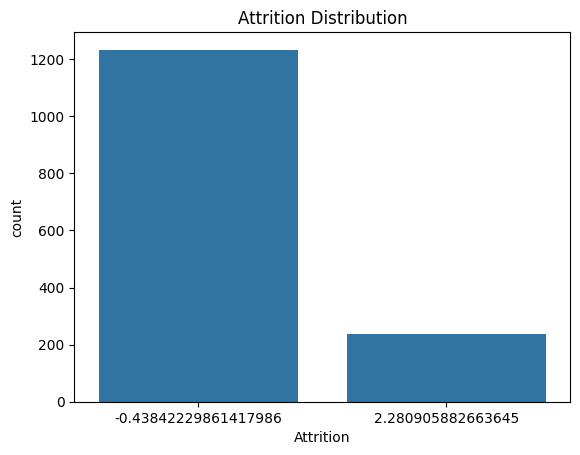

In [18]:
# Attrition count
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

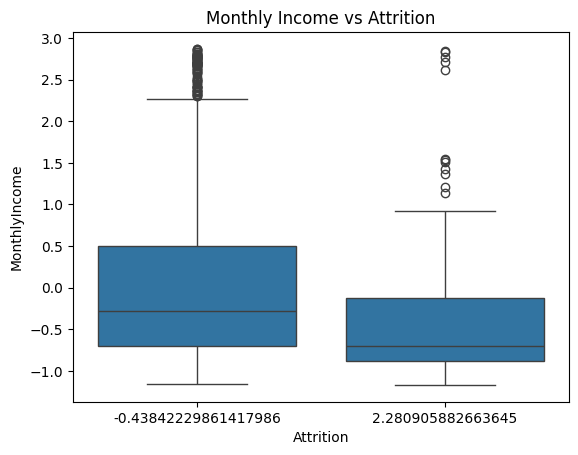

In [19]:
#Monthly Income by Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()

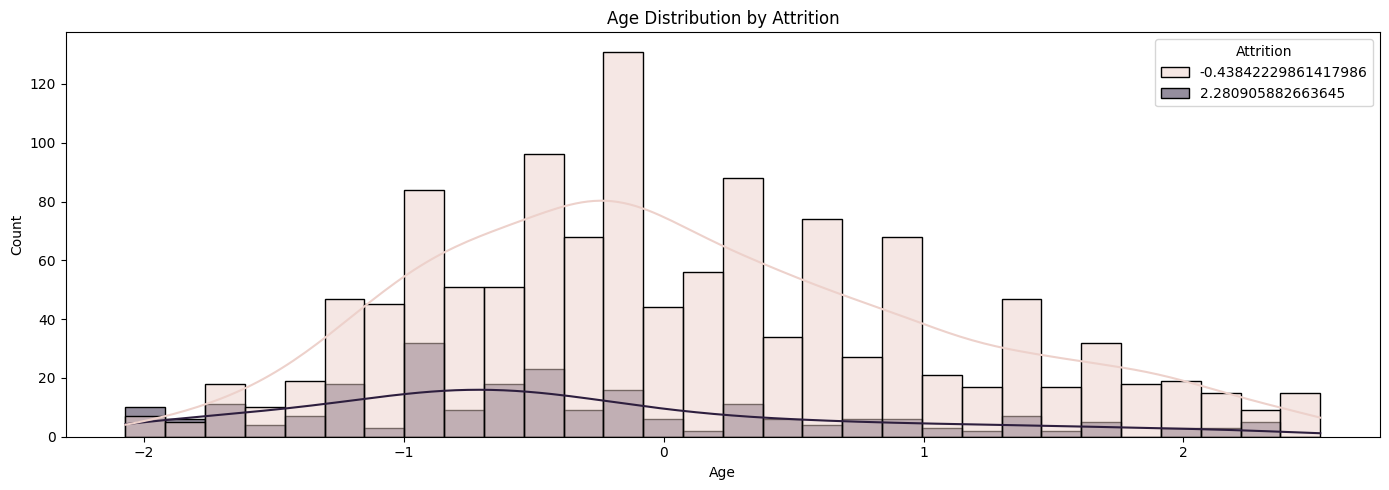

In [24]:
# visualizations,age with Attribution Count
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x='Age', hue='Attrition', bins=30, kde=True)
plt.title('Age Distribution by Attrition')
plt.tight_layout()
plt.show()


#  Model Building 

In [28]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# Step 2: Load dataset
df = pd.read_csv("HR-Employee-Attrition.csv")

In [46]:
# Step 2: Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoders = {}
for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [47]:

# Step 3: Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]  # This should NOT be scaled


In [48]:
# Step 4: Scale numeric features (only X, not y)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [49]:
# Step 5: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [50]:

# Step 6: Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8707482993197279
Precision: 0.5714285714285714
Recall: 0.10256410256410256
F1 Score: 0.17391304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



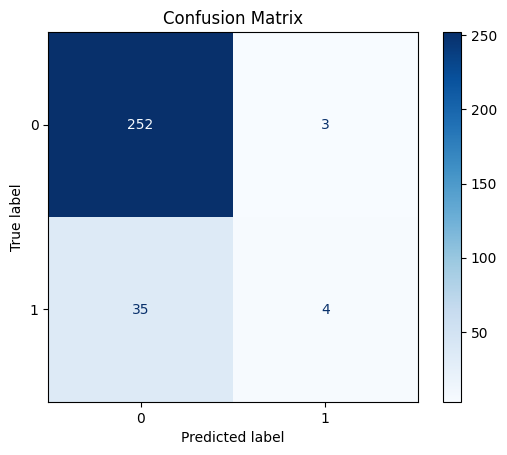

In [55]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


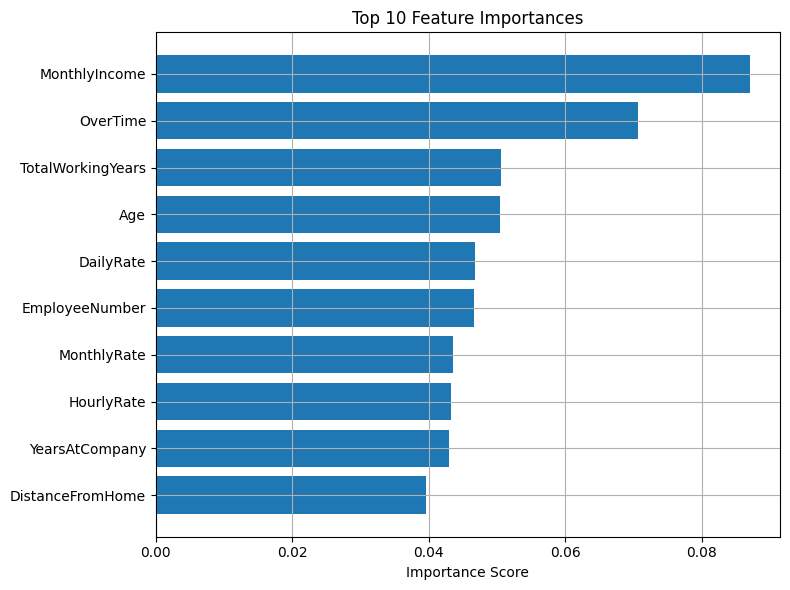

In [64]:
# top 10 feature 
importances = model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()[::-1][:10]  
plt.figure(figsize=(8, 6))
plt.barh(range(10), importances[sorted_idx][::-1])
plt.yticks(range(10), features[sorted_idx][::-1])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
